In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear machine

Set a seed for reproducibility:

In [31]:
SEED = 42

In [32]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(SEED)

## Hyperplane separation

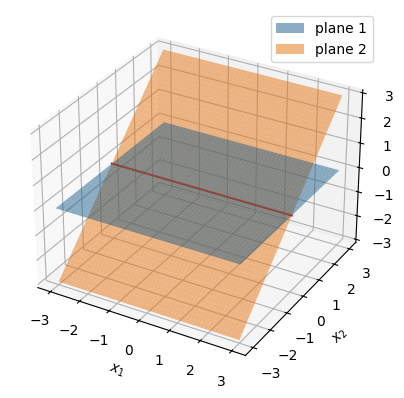

In [33]:
x = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, x)

# plane 1
w1 = np.array([0, 0])
b1 = 0
surf1 = x1 * w1[0] + x2 * w1[1] + b1

# plane 2
w2 = np.array([0, 1])
b2 = 0
surf2 = x1 * w2[0] + x2 * w2[1] + b2

# intersection line
w_inter = w1 - w2
b_inter = b1 - b2
x1_inter = np.array([x[0], x[-1]])
x2_inter = - (w_inter[0] * x1_inter + b_inter) / w_inter[1]
z_inter = x1_inter * w1[0] + x2_inter * w1[1] + b1

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(x1, x2, surf1, alpha=0.5, label="plane 1")
ax.plot_surface(x1, x2, surf2, alpha=0.5, label="plane 2")
ax.plot(x1_inter, x2_inter, np.zeros_like(x1_inter), color="red")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$z$")

ax.legend()
plt.show()

## Linear machine model 

A linear machine is a classifier that separates classes using hyperplanes. It can used for multi-class classification. The formulation of the linear machine is given by:

$$
\hat{y}_i = g_i(\mathbf{x}) = \mathbf{w}_i \cdot \mathbf{x} = \mathbf{w}_i^T \mathbf{x},
$$

where $g_i$ is the discriminative function for class $i$ and $\mathbf{w}_i$ is the weight vector for class $i$.


Considering $c$ classes and $d$-dimensional input vectors, we can organize the weights in a matrix $\mathbf{W}_{d\times c} = [\mathbf{w}_1, \mathbf{w}_2, \ldots, \mathbf{w}_c]$, and the input vectors in a matrix $\mathbf{X}_{n\times d)} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n]$, where the first row is the bias term. The output of the linear machine is given by:

$$
\mathbf{\hat{Y}}_{n\times c} = \mathbf{X}_{n\times d} \mathbf{W}_{{d\times c}},
$$

where the $\hat{y}_{ji}$ entry is the predicted value for the $j$-th input and the $i$-th class.

Train set size: 80
Test set size: 20
ymin: 0, ymax: 2


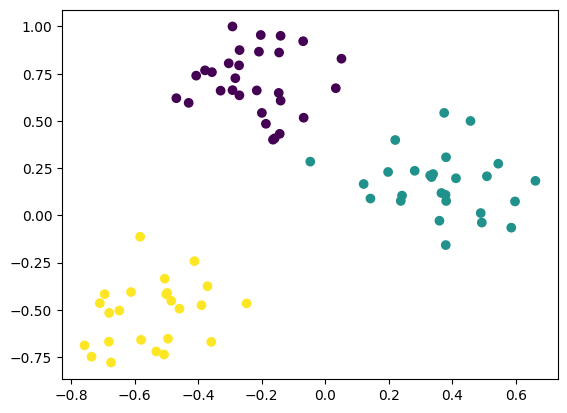

In [34]:
from utils import make_classification_dataset, plot_classification_dataset_2D
from sklearn.model_selection import train_test_split

X, y = make_classification_dataset(100, 2, 3, cluster_std=2)

# Normalize X
X = X / X.max()

# # Add bias term
# X = np.hstack([X, np.ones((X.shape[0], 1))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

print(f"ymin: {y.min()}, ymax: {y.max()}")

In [35]:
import numpy as np
W = np.random.randn(2, 3) # d=2 features, c=3 classes
Y = np.dot(X_train, W) # (n, d) * (d, c) = (n, c)
print(Y.shape)
print(Y[:5])

(80, 3)
[[ 0.22064844  0.11151681  0.00892652]
 [ 0.23782652 -0.12377476 -0.67290554]
 [ 0.18496815 -0.22434856 -0.88166772]
 [ 0.53051369  0.26604541  0.0156468 ]
 [ 0.10523415 -0.11868937 -0.47657156]]


### One-hot encoding

The one-hot encoding is a binary representation of the classes. For example, if we have three classes, the one-hot encoding is given by:

$$
\begin{aligned}
\text{Class 1} & : [1, 0, 0], \\
\text{Class 2} & : [0, 1, 0], \\
\text{Class 3} & : [0, 0, 1].
\end{aligned}
$$

For a dataset with $n$ samples and $c$ classes, the one-hot encoding is given by a matrix $\mathbf{Y}_{n\times c}$, where each row is the one-hot encoding of the class of the sample. This representation is used to convert the labels to the output format of the linear machine.

In [36]:
def onehot(y, n_classes):
    """
    Convert integer labels to one-hot encoding.
    """
    return np.eye(n_classes)[y]


Y_train_onehot = onehot(y_train, 3)
Y_test_onehot = onehot(y_test, 3)

print(y_train[:5])
print(Y_train_onehot[:5])

[1 0 0 1 0]
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


## Pseudo-inverse solution for the linear machine

The solution for the linear machine can be obtained using the pseudo-inverse of the input matrix. The pseudo-inverse is a generalization of the matrix inverse for non-square matrices. The pseudo-inverse of a matrix $\mathbf{X}$ is given by:

$$
\mathbf{X}^+ = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T.
$$

Based on the linear machine model $\mathbf{Y} = \mathbf{X} \mathbf{W}$, the weights of the linear machine can be obtained using the pseudo-inverse of the input matrix:

$$
\mathbf{W} = \mathbf{X}^+ \mathbf{Y},
$$

where $\mathbf{X}^+$ is the pseudo-inverse of $\mathbf{X}$.

In [37]:
# pseudo inverse of X
X_pinv = np.linalg.pinv(X_train)
W = np.dot(X_pinv, Y_train_onehot)
print(W.shape) # d=2 features, c=3 classes

(2, 3)


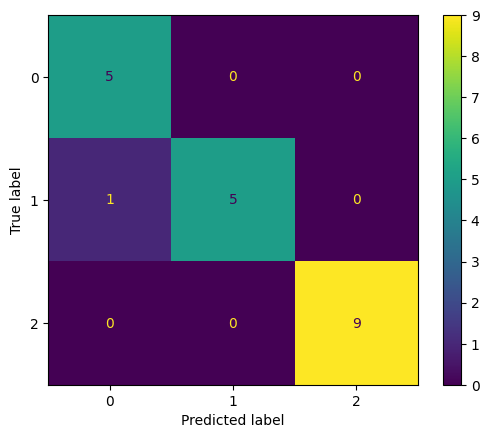


Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         9

    accuracy                           0.95        20
   macro avg       0.94      0.94      0.94        20
weighted avg       0.96      0.95      0.95        20

[2 1 0 2 1 2 0 0 0 2 0 2 2 1 2 2 2 1 1 0]
[[ 0.11731966 -0.5387746   0.7881885 ]
 [-0.20569984  0.21781827 -0.27570975]
 [ 0.7358588  -0.19816352  0.10194867]
 [ 0.01155201 -0.43255219  0.6552145 ]
 [-0.09237392  0.15005517 -0.20332198]]


In [38]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Y_pred_onehot = np.dot(X_test, W)
y_pred = np.argmax(Y_pred_onehot, axis=1) # max index along axis 1 (columns)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)

print(y_pred)
print(Y_pred_onehot[:5])